# K-Nearest Neighbours

In this exercise we use the classical Iris data set (https://archive.ics.uci.edu/ml/datasets/Iris) in order to construct a nearest neighbour model for predicting the class of an iris plant given a set of 4 attributes.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
iris_raw = load_iris()

iris = pd.DataFrame(iris_raw.data)
iris.columns = iris_raw.feature_names
iris["label"] = iris_raw.target_names[iris_raw.target]

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


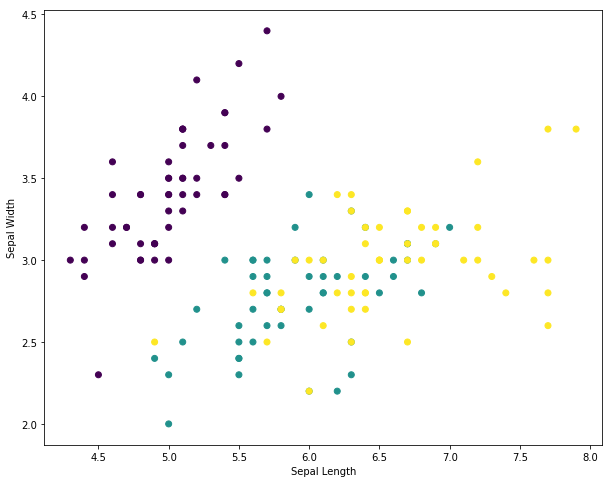

In [3]:
import matplotlib.pyplot as plt

plt.figure(1, figsize=(10, 8))
plt.scatter(iris['sepal length (cm)'] , iris['sepal width (cm)'], 
            c=iris_raw.target, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

### Q: What do we observe?

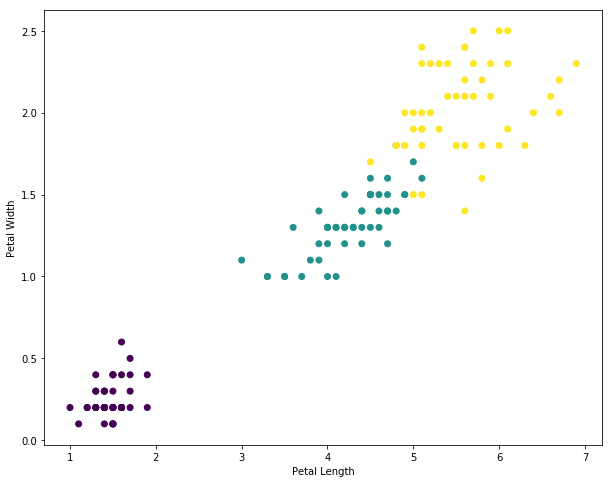

In [4]:
plt.figure(2, figsize=(10, 8))
plt.scatter(iris['petal length (cm)'] , iris['petal width (cm)'], 
            c=iris_raw.target, cmap='viridis')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

### Q: What do we observe?

### Applying the k-nearest neighbour algorithm

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = iris_raw.data
y = iris_raw.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [6]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.866666666667


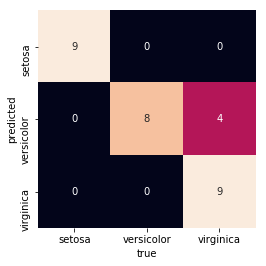

In [7]:
import seaborn as sns;
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris_raw.target_names,
            yticklabels=iris_raw.target_names)
plt.xlabel('true')
plt.ylabel('predicted');
plt.show()

### Q: Is this a valid approach?

## Cross-Validation 

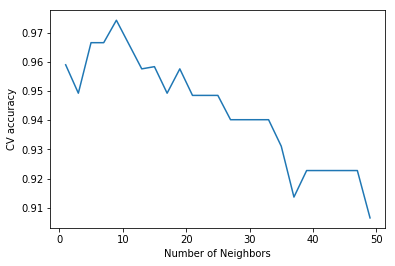

The optimal number of neighbors is:  9


In [8]:
from sklearn.model_selection import cross_val_score

neighbors = range(1, 50, 2)

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('CV accuracy')
plt.show()

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is: ", optimal_k)


### Q: What is optimal?

## The "Optimal" Model

0.933333333333


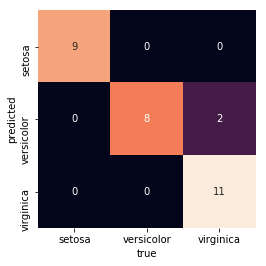

In [9]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris_raw.target_names,
            yticklabels=iris_raw.target_names)
plt.xlabel('true')
plt.ylabel('predicted');
plt.show()